In [19]:
import torch
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import pickle
import anndata as ad


In [20]:
# dataset_path = '/home/hanyuji/Data/scNODE_data/h5ad/zebrafish_scNODE0_2000genes_3227cells_12tps.h5ad'
# dataset_path = '/home/hanyuji/Data/scNODE_data/h5ad/drosophila_scNODE2_2000genes_2489cells_11tps.h5ad'
# dataset_path = '/home/hanyuji/Workbench/ST/paste_alignment_cortex/PASTE_align/cortex_macaque1_119slice_subset_1000spot_2000gene_HVG.h5ad'
# dataset_path = '/mnt/sdc/hanyuji/Workbench/ST/ST_data_check/PASTE_demo/paste_alignment.h5ad'
# dataset_path = '/home/hanyuji/Data/sxa_ST_data/h5ad_BiGATAE/breast_cancer_4slices_254spot_6397gene.h5ad'
# dataset_path = '/home/hanyuji/Data/sxa_ST_data/h5ad_BiGATAE/Human_DLPFC_12slices_4384spot_3000gene.h5ad'

# index = 5
# cSCC = ['cSCC_P10_3slices_608spot_3000gene.h5ad', 'cSCC_P4_2slices_744spot_3000gene.h5ad', 'cSCC_P6_2slices_3650spot_3000gene.h5ad',
#  'cSCC_P2_3slices_646spot_3000gene.h5ad', 'cSCC_P5_3slices_521spot_3000gene.h5ad', 'cSCC_P9_3slices_1145spot_3000gene.h5ad']
# dataset_path = f'/home/hanyuji/Data/sxa_ST_data/h5ad_BiGATAE/cSCC/{cSCC[index]}'
# fig_name = cSCC[index][:15]

dataset_path = '/home/hanyuji/Workbench/ST/paste_alignment_cortex/PASTE_align/macaque_hippocampus_cell_macaque1_30slices_1000spot_2000gene.h5ad'

adata = sc.read_h5ad(dataset_path)
adata

/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 30000 × 2000
    obs: 'region', 'cellID', 'x', 'y', 'cellType', 'batch'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p'
    obsm: 'spatial'

In [21]:
# def random_subset(adata,cell_num=1200):
#     '''
#     随机选取 12,00 个细胞
#     '''
    
#     random_indices = np.random.choice(adata.n_obs, cell_num, replace=False)   # 从 276593 个细胞中随机选取 3000 个细胞的索引
#     adata_subset = adata[random_indices, :]   # 使用选取的索引创建新的 AnnData 对象

#     return adata_subset

# subset = random_subset(adata,5000)

In [22]:
# timepoints = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
# subset = adata[adata.obs['batch'].isin(timepoints)]
# # adata.obs['batch'] = adata.obs['slice']/10

# adata = subset

In [23]:
# adata.obs['batch'] = adata.obs['batch'].astype('float')

# adata.obs['batch']

In [24]:
raw_slices = np.load('/home/hanyuji/Workbench/scNODE_ST/data_15slices_0-14.npy')
impute_slices = np.load('/home/hanyuji/Workbench/scNODE_ST/recon_15slices_0-14.npy')


In [47]:
train_list = [4,6]
test_list = []


adatas = []
for i in train_list:
    adata = sc.AnnData(raw_slices[i])
    adata.obs['batch'] = i*10
    adatas.append(adata)
for i in test_list:
    adata = sc.AnnData(impute_slices[i])
    adata.obs['batch'] = i
    adatas.append(adata)

In [48]:
subset_combined_adata = ad.concat(
    adatas, 
    axis=0, 
    join='outer', 
    merge='unique', 
    uns_merge='unique', 
    fill_value=0
)

/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [49]:
adata = subset_combined_adata
adata.obs['batch'] = adata.obs['batch'].astype('category')

/home/hanyuji/miniconda3/envs/PASTE/lib/python3.9/site-packages/umap/umap_.py:1394: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


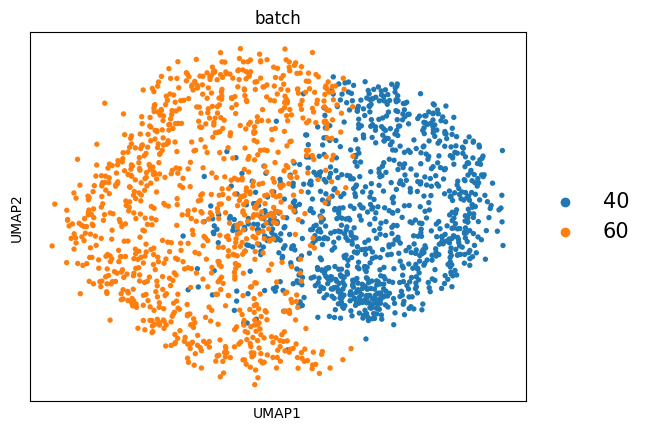

In [50]:
fig_name = 'macaque_hippocampus_30slices'
batch = 'batch'

min_dist=0.1
spread=0.3
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_pcs=40, n_neighbors=30, use_rep='X')

sc.tl.umap(adata, min_dist=min_dist,spread=spread)
sc.pl.umap(adata, color=[batch],legend_fontsize=15, ncols=2, save=f'_{fig_name}_pca_{min_dist}_{spread}') 